In [2]:
# Leer dataframe con datos
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('datos_proc2.csv')

df = df.drop(columns=['R. Comb. (km/l)', 'R. Ajust. (km/l)', 
                     'Calificación Gas Ef. Inv.',
                     'Versión_Mean_Encoded', 'Comb._Mean_Encoded', 'NOx (g/1000km)'], axis=1)

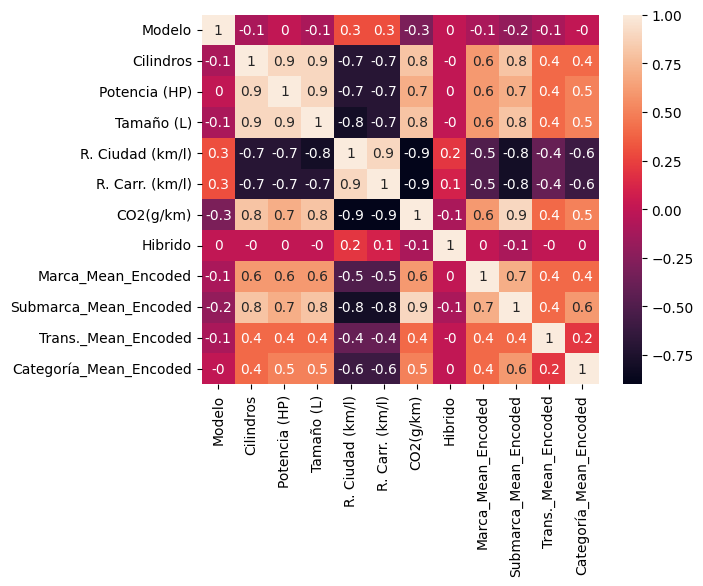

In [3]:
# Matriz de correlaciones
import seaborn as sns
import matplotlib.pyplot as plt

matrix = df.corr().round(1)
sns.heatmap(matrix, annot=True)
plt.show()

In [18]:
tabla = df.iloc[:, 8:12].describe().round(2)

print(tabla.to_latex(index=True))

\begin{tabular}{lrrrr}
\toprule
 & Marca_Mean_Encoded & Submarca_Mean_Encoded & Trans._Mean_Encoded & Categoría_Mean_Encoded \\
\midrule
count & 4601.000000 & 4601.000000 & 4601.000000 & 4601.000000 \\
mean & 256.730000 & 256.730000 & 256.730000 & 256.730000 \\
std & 47.280000 & 69.200000 & 32.420000 & 39.530000 \\
min & 139.130000 & 111.000000 & 163.000000 & 178.540000 \\
25% & 222.160000 & 201.000000 & 230.710000 & 204.460000 \\
50% & 250.080000 & 246.730000 & 271.690000 & 270.920000 \\
75% & 288.040000 & 294.000000 & 271.690000 & 294.610000 \\
max & 481.760000 & 611.000000 & 447.310000 & 294.610000 \\
\bottomrule
\end{tabular}



In [7]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(scaled, columns = df.columns)


df_train = df_scaled.sample(frac = 0.7)
# Variables predictivas
x_train = df_train.drop(columns=['CO2(g/km)'], axis=1)

# Variable objetivo
y_train = df_train['CO2(g/km)']

In [8]:
df_test = df_scaled.drop(df_train.index)

x_test = df_test.drop(columns=['CO2(g/km)'], axis=1)
y_test = df_test['CO2(g/km)']

In [10]:
# Paquete del modelo
from sklearn import linear_model

# Creación del objeto del modelo
model = linear_model.LinearRegression()

# Entrenamiento y ajuste del modelo
model.fit(x_train, y_train)

LinearRegression()

In [15]:
model.coef_

array([-0.01932586,  0.08866299, -0.07878063,  0.09097715, -0.24399737,
       -0.25687295, -0.01170958,  0.03335283,  0.37197494,  0.01704222,
       -0.02774703])

In [16]:
# Los atributos intercept y coev devuelven los valores de b; lo que devuelve la ecuación del modelo para explicar Y
print(f'y = {round(model.intercept_, 4)}', end = ' ')
for i in range(len(model.coef_)):
    print(f'+ X_{i} ({round(model.coef_[i], 4)})', end = ' ')

y = 0.3408 + X_0 (-0.0193) + X_1 (0.0887) + X_2 (-0.0788) + X_3 (0.091) + X_4 (-0.244) + X_5 (-0.2569) + X_6 (-0.0117) + X_7 (0.0334) + X_8 (0.372) + X_9 (0.017) + X_10 (-0.0277) 

In [17]:
# Se predice a partir de los valores de prueba
y_pred = model.predict(x_test)
y_pred

array([0.04941275, 0.06480505, 0.03733902, ..., 0.5578818 , 0.62607406,
       0.73697201])

In [18]:
from sklearn.metrics import mean_absolute_percentage_error as mape

# Se usa una métrica de error adecuada (MAPE calcula el porcentaje del error cuadrado medio)
mape(y_pred, y_test)


0.1672536734281358

In [19]:
df_inter = df_scaled.copy()

# Se desescala el conjunto de datos, previamente escalado
descaled = scaler.inverse_transform(df_inter)
df_descaled = pd.DataFrame(descaled, columns = df_inter.columns, index = df_inter.index)
df_descaled

,Modelo,Cilindros,Potencia (HP),Tamaño (L),R. Ciudad (km/l),R. Carr. (km/l),CO2(g/km),Hibrido,Marca_Mean_Encoded,Submarca_Mean_Encoded,Trans._Mean_Encoded,Categoría_Mean_Encoded
0,2015.0,4.0,188.0,2.00,27.44,28.57,107.0,1.0,236.245136,194.409091,212.619433,204.461003
1,2016.0,4.0,188.0,2.00,27.44,28.57,107.0,1.0,236.245136,194.409091,212.619433,204.461003
2,2017.0,4.0,188.0,2.00,25.62,24.77,123.0,1.0,236.245136,194.409091,212.619433,204.461003
3,2018.0,4.0,188.0,2.00,25.62,24.77,123.0,1.0,236.245136,194.409091,271.689271,204.461003
4,2011.0,4.0,156.0,2.50,24.00,21.90,135.0,1.0,236.245136,194.409091,212.619433,204.461003
...,...,...,...,...,...,...,...,...,...,...,...,...
4596,2012.0,8.0,506.0,5.00,4.42,9.60,446.0,0.0,366.325000,378.086957,271.689271,294.606742
4597,2013.0,8.0,506.0,5.00,4.42,9.60,446.0,0.0,366.325000,378.086957,271.689271,294.606742
4598,2016.0,12.0,630.0,5.98,4.41,7.30,482.0,0.0,290.232620,482.000000,271.689271,294.606742
4599,2018.0,12.0,630.0,5.98,4.41,7.30,482.0,0.0,290.232620,482.000000,271.689271,294.606742


In [20]:
model.feature_names_in_

array(['Modelo', 'Cilindros', 'Potencia (HP)', 'Tamaño (L)',
       'R. Ciudad (km/l)', 'R. Carr. (km/l)', 'Hibrido',
       'Marca_Mean_Encoded', 'Submarca_Mean_Encoded',
       'Trans._Mean_Encoded', 'Categoría_Mean_Encoded'], dtype=object)

In [27]:
import sklearn.metrics as metrics
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    # mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    # print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [28]:
regression_results(y_test, y_pred)

explained_variance:  0.9265
r2:  0.9263
MAE:  0.027
MSE:  0.0015
RMSE:  0.0386
